# Разведочный анализ данных: Data Cleaning. Практическая работа

## Цели практической работы
* Потренироваться выявлять и заполнять пропущенные значения в данных.
* Потренироваться преобразовывать типы данных.
* Потренироваться выявлять и обрабатывать аномальные значения в данных.
* Подготовить датафрейм к этапу генерации признаков.



## Задача

В этой практической работе вы продолжите исследовать и готовить данные для этапа моделирования: заполнять пропущенные значения в некоторых переменных, изменять типы данных и обрабатывать выбросы.

Напомним, что вы работаете с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


## Что входит в практическую работу
1. Загрузить датасет и ознакомиться с ним.
2. Исследовать переменные датасета на наличие пропусков.
3. Обработать пропуски в зависимости от типа переменной.
4. Изменить типы данных.
5. Исследовать данные на аномальные значения и скорректировать выбросы.

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- Репозиторий проекта содержит осмысленные коммиты с конкретными реализованными фичами, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них видеоматериалов.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.




## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему куратору.

## Обязательные задачи

In [129]:
# Импортируйте необходимые библиотеки
import pandas as pd
import missingno as msno

### Задача 1. Загрузка датасета и ознакомление с количеством пропущенных значений

1. Загрузите датасет из `data/df_out.csv` и выведите первые пять записей.



In [130]:
# Ваш код здесь
df_out = pd.read_csv('df_out.csv', sep=',')
df_out.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. Выведите информацию о датафрейме и обратите внимание на оставшиеся незаполненные значения.


In [131]:
# Ваш код здесь
df_out.describe()

,id,price,year,odometer,lat,long
count,1.000000e+04,1.000000e+04,9964.000000,10000.00000,9902.000000,9902.000000
mean,7.311541e+09,2.067842e+04,2010.927941,93324.13400,38.594142,-94.165877
std,4.477653e+06,1.246230e+05,9.672040,63181.17499,5.844895,18.128504
min,7.208550e+09,5.000000e+02,1915.000000,0.00000,-67.144243,-158.069300
25%,7.308189e+09,7.900000e+03,2008.000000,39147.25000,34.830368,-110.322086
50%,7.312757e+09,1.574950e+04,2013.000000,89000.00000,39.298522,-88.000050
75%,7.315274e+09,2.799000e+04,2017.000000,136875.00000,42.428070,-80.830000
max,7.317090e+09,1.234568e+07,2022.000000,283466.00000,64.947500,173.885502


<Axes: >

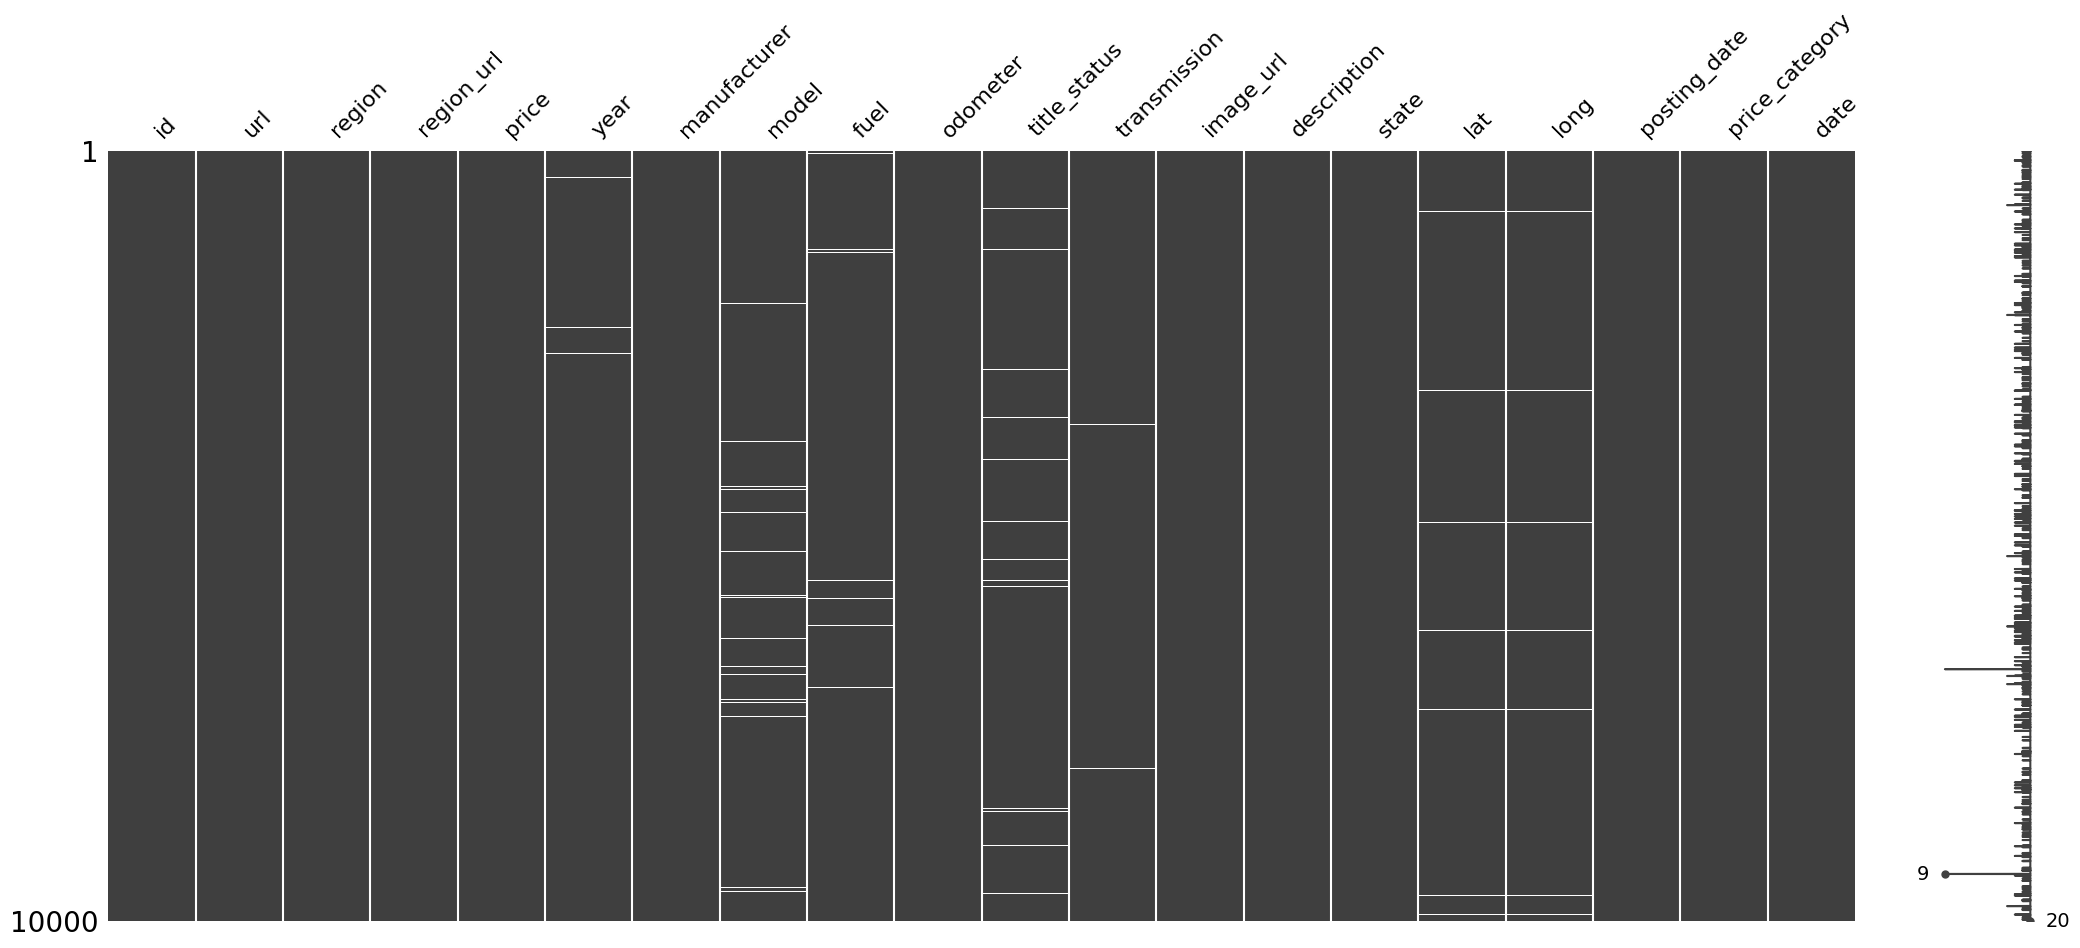

In [132]:
msno.matrix(df_out)

3. Выведите количество полностью заполненных объектов и их процент из всей выборки. Воспользуйтесь материалами из видео.


In [133]:
# Ваш код здесь
def print_full_rows(data):
    print('Количество полностью заполненных объектов:', len(df_out.dropna()))
    print('Процент полностью заполненных объектов от всей выборки:', len(df_out.dropna()) / len(df_out) * 100)

print_full_rows(df_out)

Количество полностью заполненных объектов: 9507
Процент полностью заполненных объектов от всей выборки: 95.07


4. Сохраните в переменную и выведите процент пропущенных значений для каждого признака, отсортируйте признаки по убыванию процента пропущенных значений. Воспользуйтесь материалами из видео и не забудьте передать верный параметр сортировки.


In [134]:
# Ваш код здесь
missing_values = (df_out.isna().sum() / len(df_out) * 100).sort_values(ascending=False)
print('Процент пропущенных значений для каждого признака:')
missing_values

Процент пропущенных значений для каждого признака:


title_status      1.66
model             1.28
lat               0.98
long              0.98
fuel              0.63
transmission      0.45
year              0.36
description       0.02
date              0.02
posting_date      0.02
image_url         0.02
id                0.00
region_url        0.00
region            0.00
url               0.00
price             0.00
odometer          0.00
manufacturer      0.00
state             0.00
price_category    0.00
dtype: float64

5. Выведите список всех признаков, в которых имеются пропущенные значения. Воспользуйтесь результатом вывода предыдущего задания, чтобы отсортировать признаки, подходящие под условие.

In [135]:
# Ваш код здесь
missing_columns = missing_values[missing_values.values > 0].index.tolist()
missing_columns

['title_status',
 'model',
 'lat',
 'long',
 'fuel',
 'transmission',
 'year',
 'description',
 'date',
 'posting_date',
 'image_url']

### Задача 2. Обработка пропусков в годе выпуска автомобиля

1. Выведите количество значений для года выпуска автомобиля, включая пропущенные значения.


In [136]:
# Ваш код здесь
df_out.year.value_counts(dropna=False)

year
2018.0    810
2017.0    809
2016.0    745
2013.0    699
2015.0    668
         ... 
1940.0      1
1950.0      1
1960.0      1
1923.0      1
1938.0      1
Name: count, Length: 90, dtype: int64

2. Выведите количество пропущенных значений в годе выпуска автомобиля.



In [137]:
# Ваш код здесь
print(df_out.year.isna().sum())

36


3. Выведите описательные статистики для года выпуска автомобиля.


In [138]:
# Ваш код здесь
df_out.year.describe()

count    9964.000000
mean     2010.927941
std         9.672040
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

4. Выведите записи, в которых год выпуска автомобиля не заполнен. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


In [139]:
# Ваш код здесь
df_out[df_out.year.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high,2021-05-03 18:31:39+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,NaN,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high,2021-05-04 18:11:22+00:00
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,other,Odyssey,gas,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high,2021-04-24 16:41:06+00:00
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high,2021-04-14 16:51:36+00:00
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,other,CR-V,gas,44128,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high,2021-04-20 18:46:55+00:00
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,other,a Sienna,gas,43701,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high,2021-04-28 16:12:14+00:00
1845,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,other,Transit Cargo Van,gas,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high,2021-04-07 21:10:06+00:00


5. Обработайте пропуски, удалив записи, в которых год выпуска автомобиля не заполнен, и сохраните обновлённый датафрейм, а затем выведите его размерность.


In [140]:
# Ваш код здесь
df_out = df_out[df_out.year.notna()]
df_out

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002.0,toyota,rav4,gas,150000,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low,2021-04-10 20:33:57+00:00
9996,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008.0,jeep,wrangler,gas,113573,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium,2021-05-03 13:36:30+00:00
9997,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,audi,a3 2.0t premium plus pzev,gas,150184,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low,2021-04-22 19:14:01+00:00
9998,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,porsche,cayenne,hybrid,61943,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high,2021-04-14 14:14:42+00:00


6. Выведите количество пропущенных значений в годе выпуска автомобиля для обновлённого датафрейма.

In [176]:
print("Количество пропущенных значений в year:", df_out.year.isna().sum())  # Допишите код

Количество пропущенных значений в year: 0


### Задача 3. Обработка пропусков в типе топлива

1. Выведите количество значений для типа топлива, включая пропущенные значения. Обратите внимание на количество пропущенных значений.




In [177]:
# Ваш код здесь
df_out.fuel.value_counts(dropna=False)

fuel
gas         8379
other        729
diesel       650
hybrid       108
NaN           54
electric      44
Name: count, dtype: int64

2. Выведите описательные статистики для типа топлива.


In [178]:
# Ваш код здесь
df_out.fuel.describe()

count     9910
unique       5
top        gas
freq      8379
Name: fuel, dtype: object

3. Выведите записи, в которых тип топлива не заполнен. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


In [179]:
# Ваш код здесь
df_out[df_out.fuel.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
32,7309910590,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,4977,2001.0,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,193242,clean,automatic,https://images.craigslist.org/00F0F_ebtJlxCQjv...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-20T10:40:15-0700,low,2021-04-20 17:40:15+00:00
78,7314559074,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,27977,2009.0,ford,"f-150 4wd supercrew 145"" platinum",NaN,79522,clean,automatic,https://images.craigslist.org/00L0L_khoMmqXaSJ...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-29T15:15:30-0700,high,2021-04-29 22:15:30+00:00
275,7315141987,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29888,2019.0,nissan,frontier crew cab 4x2 sv auto,NaN,10679,clean,automatic,https://images.craigslist.org/00F0F_d9wEXQuSyu...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T15:50:19-1000,high,2021-05-01 01:50:19+00:00
471,7316807613,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,13436,2006.0,chevrolet,"silverado 1500 ext cab 143.5"" wb 4wd ls",NaN,172700,clean,automatic,https://images.craigslist.org/00l0l_35tV0gQdD8...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-05-04T10:20:19-0700,medium,2021-05-04 17:20:19+00:00
1009,7314561306,https://cnj.craigslist.org/ctd/d/parlin-2000-c...,central NJ,https://cnj.craigslist.org,5894,2000.0,chevrolet,"s-10 ext cab 123"" wb ls",NaN,78740,clean,automatic,https://images.craigslist.org/00O0O_8vd70bT1rY...,***Call Us for more information at: 732-316-55...,nj,40.468650,-74.296990,2021-04-29T18:20:19-0400,low,2021-04-29 22:20:19+00:00
1279,7310297136,https://westernmass.craigslist.org/ctd/d/johns...,western massachusetts,https://westernmass.craigslist.org,6000,2008.0,other,IC IC,NaN,0,NaN,automatic,https://images.craigslist.org/00404_cBFpBKbfr2...,"2008 *IC* *IC* CE300 - $6,000Call Us Today! 85...",ma,43.008105,-74.352011,2021-04-21T10:11:05-0400,low,2021-04-21 14:11:05+00:00
1318,7310414739,https://nwct.craigslist.org/ctd/d/melville-200...,northwest CT,https://nwct.craigslist.org,11995,2007.0,gmc,c-7500 multiple uses perfect,NaN,50098,clean,automatic,https://images.craigslist.org/00T0T_jvsOAKSGAr...,2007 *GMC* *C-7500 MULTIPLE USES PERFECT* FOR ...,ct,40.681179,-73.430488,2021-04-21T13:18:41-0400,medium,2021-04-21 17:18:41+00:00
1686,7316342709,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,19942,2017.0,ram,"promaster cargo van 1500 low roof 118"" wb",NaN,88836,clean,automatic,https://images.craigslist.org/00707_6ZlIIpYmGf...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T14:40:24-0400,medium,2021-05-03 18:40:24+00:00
1847,7315151536,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29988,2019.0,toyota,sienna le fwd 8-passenger (natl),NaN,18762,clean,automatic,https://images.craigslist.org/00R0R_dO0gtiRwLa...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T16:25:22-1000,high,2021-05-01 02:25:22+00:00


4. Обработайте пропуски, заполнив незаполненные значения типа топлива значением `other`, и сохраните изменения. Обратите внимание, что мы заполняем пропуски не самым популярным значением в выборке.


In [181]:
# Ваш код здесь
df_out.fuel = df_out.fuel.fillna('other')

5. Выведите для обновлённого датафрейма количество пропущенных значений для типа топлива.

In [182]:
print("Количество пропущенных значений в fuel:", df_out.fuel.isna().sum())  # Допишите код

Количество пропущенных значений в fuel: 0


### Задача 4. Обработка пропусков в модели автомобиля

1. Выведите количество значений для модели автомобиля, включая пропущенные значения. Обратите внимание на количество пропущенных значений.



In [183]:
# Ваш код здесь
df_out.model.value_counts(dropna=False)

model
f-150                  151
NaN                    126
silverado 1500         110
1500                   100
camry                   77
                      ... 
Suzuki Grand Vitara      1
paceman                  1
750i / alpina b7         1
forester xs awd          1
durangon r/t             1
Name: count, Length: 3447, dtype: int64

2. Выведите описательные статистики для модели автомобиля.


In [184]:
# Ваш код здесь
df_out.model.describe()

count      9838
unique     3446
top       f-150
freq        151
Name: model, dtype: object

3. Выведите записи, в которых модель автомобиля не заполнена. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


In [185]:
# Ваш код здесь
df_out[df_out.model.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,gas,165206,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low,2021-05-04 20:11:15+00:00
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,gas,132000,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low,2021-05-04 01:33:40+00:00
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,gas,190000,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low,2021-04-08 13:10:07+00:00
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,gas,121371,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium,2021-05-01 14:05:17+00:00
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,diesel,220019,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium,2021-05-03 01:06:09+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007.0,toyota,NaN,gas,85285,clean,automatic,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low,2021-04-29 15:50:54+00:00
9616,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012.0,ram,NaN,gas,73082,clean,automatic,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium,2021-04-09 20:24:23+00:00
9670,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005.0,gmc,NaN,gas,52536,clean,automatic,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low,2021-04-20 08:48:30+00:00
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,rover,NaN,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00


4. Если подробнее изучить значения описания автомобиля, то, возможно, модель автомобиля получится восстановить из описания. Сейчас обработайте пропуски, заполнив незаполненные значения модели автомобиля значением `other`, и сохраните изменения. Обратите внимание, что мы в очередной раз заполняем пропуски не самым популярным значением в выборке.


In [186]:
# Ваш код здесь
df_out.model = df_out.model.fillna('other')

5. Выведите для обновлённого датафрейма количество пропущенных значений для модели автомобиля.

In [187]:
print("Количество пропущенных значений в model:", df_out.model.isna().sum())  # Допишите код

Количество пропущенных значений в model: 0


### Задача 5. Обработка пропусков в статусе автомобиля

1. Выведите количество значений для статуса автомобиля, включая пропущенные значения. Обратите внимание на количество пропущенных значений.


In [188]:
# Ваш код здесь
df_out.title_status.value_counts(dropna=False)

title_status
clean         9492
rebuilt        168
NaN            159
salvage         92
lien            35
missing         16
parts only       2
Name: count, dtype: int64

2. Выведите описательные статистики для модели автомобиля.



In [189]:
# Ваш код здесь
df_out.title_status.describe()

count      9805
unique        6
top       clean
freq       9492
Name: title_status, dtype: object

3. Выведите записи, в которых статус автомобиля не заполнен. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


In [190]:
# Ваш код здесь
df_out[df_out.title_status.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012.0,fiat,500 pop,gas,59242,NaN,manual,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low,2021-05-04 01:03:32+00:00
187,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013.0,ram,1500 tradesman quad cab,gas,145499,NaN,automatic,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium,2021-04-27 22:03:47+00:00
245,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019.0,toyota,sienna xle,gas,3700,NaN,automatic,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high,2021-05-01 10:35:56+00:00
286,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003.0,chevrolet,avalanche 1500,gas,268691,NaN,automatic,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low,2021-04-14 16:03:01+00:00
312,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017.0,ford,mustang,gas,66049,NaN,automatic,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium,2021-04-16 11:06:29+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013.0,honda,odyssey,gas,203112,NaN,automatic,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low,2021-04-04 17:12:27+00:00
9805,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,other,95674,NaN,NaN,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low,2021-04-28 18:25:32+00:00
9840,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014.0,lexus,rx 350,gas,70800,NaN,automatic,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium,2021-04-30 20:00:48+00:00
9856,7309717260,https://savannah.craigslist.org/ctd/d/jacksonv...,savannah / hinesville,https://savannah.craigslist.org,11495,2006.0,lexus,gx 470,gas,242000,NaN,automatic,https://images.craigslist.org/00s0s_8xg4gw6aAg...,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ...",ga,30.513566,-81.621875,2021-04-20T08:01:49-0400,medium,2021-04-20 12:01:49+00:00


4. Обработайте пропуски, заполнив незаполненные значения статуса автомобиля самым популярным значением, и сохраните изменения. Самое популярное значение передайте не в виде строки, а получите моду.


In [193]:
# Ваш код здесь
df_out.title_status = df_out.title_status.fillna(df_out.title_status.mode()[0])

5. Выведите для обновлённого датафрейма количество пропущенных значений для статуса автомобиля.


In [194]:
print("Количество пропущенных значений в title_status:", df_out.title_status.isna().sum())# Допишите код

Количество пропущенных значений в title_status: 0


6. Ещё раз выведите количество полностью заполненных объектов и их процент из всей выборки. После обработки всех пропусков можно переходить к следующему этапу.

In [195]:
# Ваш код здесь
print_full_rows(df_out)

Количество полностью заполненных объектов: 9825
Процент полностью заполненных объектов от всей выборки: 98.60497792051385


### Задача 6. Преобразование типа данных в годе выпуска автомобиля
1.  Выведите информацию о датафрейме и обратите внимание на типы данных.


In [198]:
# Ваш код здесь
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9964 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9964 non-null   int64  
 1   url             9964 non-null   object 
 2   region          9964 non-null   object 
 3   region_url      9964 non-null   object 
 4   price           9964 non-null   int64  
 5   year            9964 non-null   float64
 6   manufacturer    9964 non-null   object 
 7   model           9964 non-null   object 
 8   fuel            9964 non-null   object 
 9   odometer        9964 non-null   int64  
 10  title_status    9964 non-null   object 
 11  transmission    9921 non-null   object 
 12  image_url       9964 non-null   object 
 13  description     9964 non-null   object 
 14  state           9964 non-null   object 
 15  lat             9868 non-null   float64
 16  long            9868 non-null   float64
 17  posting_date    9964 non-null   object

2. Выведите описательные статистики для года выпуска автомобиля. Обратите внимание на тип данных.



In [199]:
# Ваш код здесь
df_out.year.info()

<class 'pandas.core.series.Series'>
Index: 9964 entries, 0 to 9999
Series name: year
Non-Null Count  Dtype  
--------------  -----  
9964 non-null   float64
dtypes: float64(1)
memory usage: 155.7 KB


3. Измените тип данных для года выпуска на более подходящий целочисленный тип и выведите получившийся тип данных только для года выпуска.

In [200]:
# Ваш код здесь
df_out.year = df_out.year.astype(int)
df_out.year.info()

<class 'pandas.core.series.Series'>
Index: 9964 entries, 0 to 9999
Series name: year
Non-Null Count  Dtype
--------------  -----
9964 non-null   int64
dtypes: int64(1)
memory usage: 155.7 KB


### Задача 7. Преобразование типа данных в категориальных переменных

1. Выведите тип данных для типа топлива автомобиля.


In [203]:
# Ваш код здесь
print(df_out.fuel.dtype)

object


2. Категориальным переменным можно задавать специальный тип данных `category`. Подробнее об этом можно прочитать в [документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html). Укажите для типа топлива тип данных `category`, сохраните изменения в переменную `series` и выведите её.


In [206]:
# Ваш код здесь
series = df_out.fuel.astype("category")

category


3. Выведите тип данных для серии. Обратите внимание на структуру вывода.

In [208]:
# Ваш код здесь
series.dtype

CategoricalDtype(categories=['diesel', 'electric', 'gas', 'hybrid', 'other'], ordered=False, categories_dtype=object)

4. Выведите первые две категории, используя вывод типа данных выше.

In [210]:
# Ваш код здесь
series.dtype.categories[:2]

Index(['diesel', 'electric'], dtype='object')

### Задача 8. Выбросы в годе выпуска

1. Выведите описательные статистики для года выпуска автомобиля. Обратите внимание на пограничные значения, на квартили.



In [211]:
# Ваш код здесь
df_out.year.describe()

count    9964.000000
mean     2010.927941
std         9.672040
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

2. Выведите границы для нормальных значений года выпуска, используя интерквартильный размах. Воспользуйтесь материалами из видео. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.


In [219]:
# Ваш код здесь
def calculate_outliers(data):
    q25 = int(data.quantile(0.25))
    q75 = int(data.quantile(0.75))
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

boundaries = calculate_outliers(df_out.year)
boundaries

(1994.5, 2030.5)

3. Посчитайте и выведите количество выбросов в годе выпуска автомобиля.


In [224]:
# Ваш код здесь
is_outliers = (df_out.year < boundaries[0]) | (df_out.year > boundaries[1])
print(is_outliers.sum())

394


4. Посчитайте и выведите долю выбросов в годе выпуска автомобиля.


In [227]:
# Ваш код здесь
print(is_outliers.sum() / len(df_out))

0.039542352468887994


5. Выведите записи, в которых год выпуска попадает в выбросы. Посмотрите на данные и подумайте, могут ли эти выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.


In [239]:
# Ваш код здесь
df_out[is_outliers].sort_values('year', ascending=True)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
401,7308847796,https://billings.craigslist.org/cto/d/columbus...,billings,https://billings.craigslist.org,5000,1915,ford,model t,gas,12345,clean,manual,https://images.craigslist.org/01616_88aseKpgub...,Things included New Rootlieb front and rear fe...,mt,45.626200,-109.257100,2021-04-18T12:20:03-0600,low,2021-04-18 18:20:03+00:00
6342,7314390836,https://kansascity.craigslist.org/ctd/d/odessa...,"kansas city, MO",https://kansascity.craigslist.org,14950,1923,ford,t-bucket,gas,15000,clean,automatic,https://images.craigslist.org/00E0E_kfyzxZlR3y...,1923 T bucket 550ci 700Hp BBC World product he...,ks,38.982900,-93.975700,2021-04-29T12:12:18-0500,medium,2021-04-29 17:12:18+00:00
5014,7313024973,https://prescott.craigslist.org/cto/d/cottonwo...,prescott,https://prescott.craigslist.org,18500,1927,chevrolet,coupe,gas,100,clean,manual,https://images.craigslist.org/00r0r_j4bp7r0piT...,"1927 Chevy Capitol A Coupe, all original, 2nd ...",az,34.571326,-112.104943,2021-04-26T13:52:28-0700,medium,2021-04-26 20:52:28+00:00
6329,7316455114,https://tucson.craigslist.org/cto/d/tucson-192...,tucson,https://tucson.craigslist.org,7800,1928,other,1928 Crysler,gas,100,clean,automatic,https://images.craigslist.org/00B0B_1FiYNYzHas...,"Here for sale is a nice Rat Rod, the body is a...",az,32.188659,-110.769482,2021-05-03T14:52:05-0700,low,2021-05-03 21:52:05+00:00
6476,7312752494,https://rochester.craigslist.org/cto/d/hilton-...,rochester,https://rochester.craigslist.org,45000,1928,ford,sport coupe,gas,2520,clean,automatic,https://images.craigslist.org/00q0q_gUJUnEwtJi...,"This 1928 Ford Model A Sport Coupe, was a 2008...",ny,43.273081,-77.795563,2021-04-26T09:39:22-0400,high,2021-04-26 13:39:22+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,7315071161,https://omaha.craigslist.org/ctd/d/blair-1994-...,omaha / council bluffs,https://omaha.craigslist.org,3250,1994,other,oldsmobile cutlass ciera,gas,58000,clean,automatic,https://images.craigslist.org/00000_gf5I6DGkgX...,Make: Oldsmobile Model: Cutlass Ciera Model Ye...,ia,41.545400,-96.161700,2021-04-30T17:40:12-0500,low,2021-04-30 22:40:12+00:00
9013,7316875336,https://cleveland.craigslist.org/cto/d/solon-1...,cleveland,https://cleveland.craigslist.org,2500,1994,ford,mustang gt,gas,94686,clean,other,https://images.craigslist.org/00X0X_hNm8WxJY4R...,A laser red 1994 Mustang GT vert with no engin...,oh,41.386600,-81.442100,2021-05-04T15:06:57-0400,low,2021-05-04 19:06:57+00:00
8460,7315131826,https://lasvegas.craigslist.org/ctd/d/henderso...,las vegas,https://lasvegas.craigslist.org,42980,1994,other,Bentley Turbo R,gas,56411,clean,automatic,https://images.craigslist.org/00L0L_4zNUr29hb2...,"1994 BENTLEY TURBO RPrice: $42,980.00Basic Inf...",nv,36.063910,-115.021630,2021-04-30T18:16:07-0700,high,2021-05-01 01:16:07+00:00
9921,7311566144,https://chico.craigslist.org/cto/d/chico-1994-...,chico,https://chico.craigslist.org,16000,1994,ford,f250,gas,32500,clean,automatic,https://images.craigslist.org/01010_343KkgTaHo...,"Up for sale is this 32,000 original mile Ford ...",ca,39.745800,-121.844400,2021-04-23T13:51:20-0700,medium,2021-04-23 20:51:20+00:00


6. Выведите количество значений для категории цены для записей, в которых год выпуска автомобиля является выбросом. Описывают ли аномальные значения года выпуска какое-либо из значений цены автомобиля лучше, чем остальные?


In [241]:
# Ваш код здесь
df_out[is_outliers].value_counts('price_category')

price_category
low       181
medium    135
high       78
Name: count, dtype: int64

7. Так как выбросы в годе выпуска находятся среди минимальных значений, заполните те значения, которые являются выбросами, значением нижней границы. Не забудьте учесть, что год должен быть целочисленным значением, входящим в границы нормальных значений.


In [244]:
# Ваш код здесь
df_out.loc[is_outliers, 'year'] = int(boundaries[0])

8. Выведите ещё раз описательные статистики для года выпуска автомобиля, чтобы проверить, что теперь все значения года входят в границы нормальных значений.

In [245]:
# Ваш код здесь
df_out.year.describe()

count    9964.000000
mean     2011.669410
std         6.516981
min      1994.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

## Дополнительные задачи

### Задача 9. Загрузка датафрейма с параметрами преобразования

Некоторые преобразования признаков можно сделать ещё в момент загрузки датафрейма из файла.

1. Прочитайте в новый датафрейм файл `data/vehicles_dataset.csv`, выбрав только нужные колонки и применив приведение типов данных. Обратитесь к [документации](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), чтобы узнать, за что отвечают параметры `usecols`,  `parse_dates` и `dtype`.


Датафрейм должен содержать:
- колонки `price`, `year`, `posting_date`;
- `posting_date` в datatime-формате;
- `price` в вещественном формате;
- `year` в целочисленном формате.

Возможно, вы столкнётесь с ошибкой при считывании года в виде целого числа. Подробнее о том, как бороться с этой ошибкой, можно узнать в документации по `обнуляемому целочисленному типу данных`:
- https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html

*Подсказка:* Pandas может представлять целочисленные данные с возможными отсутствующими значениями, используя [arrays.IntegerArray](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.arrays.IntegerArray.html#pandas.arrays.IntegerArray) или его псевдонимы, которые вы сможете найти в документации.

In [248]:
# Ваш код здесь
selected_columns = ['price', 'year', 'posting_date']

dtype = {'price':float, 'year':'Int64'}

df_vehicles = pd.read_csv('vehicles_dataset (1).csv', usecols=selected_columns, dtype=dtype)
df_vehicles.posting_date = pd.to_datetime(df_vehicles.posting_date, utc=True)
df_vehicles

,price,year,posting_date
0,54990.0,2020,2021-04-17 16:30:50+00:00
1,16942.0,2016,2021-05-03 19:40:21+00:00
2,35590.0,2017,2021-04-28 10:52:20+00:00
3,14500.0,2013,2021-04-17 14:08:57+00:00
4,21800.0,2021,2021-05-03 22:32:06+00:00
...,...,...,...
10045,4495.0,2002,2021-04-10 20:33:57+00:00
10046,14495.0,2008,2021-05-03 13:36:30+00:00
10047,8995.0,2011,2021-04-22 19:14:01+00:00
10048,31900.0,2015,2021-04-14 14:14:42+00:00


2. Выведите информацию о датафрейме, чтобы убедиться, что признаки при загрузке преобразовались верно.


In [249]:
# Ваш код здесь
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   price         10050 non-null  float64            
 1   year          10014 non-null  Int64              
 2   posting_date  10048 non-null  datetime64[ns, UTC]
dtypes: Int64(1), datetime64[ns, UTC](1), float64(1)
memory usage: 245.5 KB


3. Для первой записи в датафрейме извлеките из `posting_date` и выведите номер месяца.


In [250]:
# Ваш код здесь
df_vehicles.posting_date[0].month

4